<center><h1><b>Pakistan Super League (PSL) Win Prediction</b></h1></center>

<center><img src="psl.jpg" style="height:250px;" alt="PSL"></center>

<h2>Introduction</h2>

<p style="color:#159364; font-family:cursive;">The Pakistan Super League (PSL) is a professional Twenty20 cricket league in Pakistan. It was founded in 2015 and features six franchises representing different cities in Pakistan, namely Islamabad United, Karachi Kings, Lahore Qalandars, Multan Sultans, Peshawar Zalmi, and Quetta Gladiators.
<br><br>The league is organized by the Pakistan Cricket Board (PCB) and has quickly become one of the most popular cricket leagues in the world. It attracts top players from around the world, including Pakistan, Australia, England, West Indies, South Africa, and others. The league is played annually in February and March and features a double round-robin group stage followed by playoffs and a final.
<br><br>
The PSL has helped to revive international cricket in Pakistan, which was suspended for several years due to security concerns. The league has also provided a platform for young Pakistani players to showcase their talent and compete with some of the best players in the world.
</p>


<h2>Case Study</h2>


<h5 style="color:red; font-family:cursive;">This case study aims to use various algorithms to predict match winning based on certain features, and subsequently evaluate the accuracy of the predictions.
</h5>


<h2>Importing Required Libraries</h2>

In [51]:
import pandas as pd
import numpy as np
import math
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
import time
from sklearn.model_selection import cross_val_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
sns.set(color_codes=True)
import plotly.express as px
from sklearn import linear_model
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import warnings
warnings.filterwarnings('ignore')


<h2>Loading and Importing Data</h2>

In [2]:
df = pd.read_csv('psl_formated.csv')
df.head()

,psl_year,match_number,team_1,team_2,inning,over,ball,runs,total_runs,wickets,is_four,is_six,is_wicket,wicket,wicket_text,result
0,2016,1,Islamabad United,Quetta Gladiators,1,1,1,0,0,0,False,False,False,NaN,NaN,Gladiators
1,2016,1,Islamabad United,Quetta Gladiators,1,1,2,0,0,0,False,False,False,NaN,NaN,Gladiators
2,2016,1,Islamabad United,Quetta Gladiators,1,1,3,0,0,0,False,False,False,NaN,NaN,Gladiators
3,2016,1,Islamabad United,Quetta Gladiators,1,1,4,0,0,0,False,False,False,NaN,NaN,Gladiators
4,2016,1,Islamabad United,Quetta Gladiators,1,1,5,0,0,0,False,False,False,NaN,NaN,Gladiators


In [3]:
df.sample(10)

,psl_year,match_number,team_1,team_2,inning,over,ball,runs,total_runs,wickets,is_four,is_six,is_wicket,wicket,wicket_text,result
20841,2019,9,Peshawar Zalmi,Karachi Kings,2,11,1,1,54,4,False,False,False,NaN,NaN,Zalmi
32067,2020,27,Multan Sultans,Peshawar Zalmi,1,5,6,1,32,0,False,False,False,NaN,NaN,Sultans
8882,2017,15,Karachi Kings,Quetta Gladiators,2,6,3,0,41,0,False,False,False,NaN,NaN,Gladiators
23689,2019,21,Islamabad United,Peshawar Zalmi,2,10,6,4,78,4,False,False,False,NaN,NaN,Zalmi
30795,2020,19,Multan Sultans,Karachi Kings,1,10,3,1,51,4,False,False,False,NaN,NaN,no_result
16260,2018,23,Peshawar Zalmi,Quetta Gladiators,2,19,5,1,152,4,False,False,False,NaN,NaN,Gladiators
31326,2020,23,Karachi Kings,Lahore Qalandars,1,1,6,1,4,0,False,False,False,NaN,NaN,Qalandars
24221,2019,23,Peshawar Zalmi,Quetta Gladiators,2,17,5,1,146,2,False,False,False,NaN,NaN,Gladiators
26084,2019,31,Quetta Gladiators,Peshawar Zalmi,2,10,5,1,63,3,False,False,False,NaN,NaN,Gladiators
20893,2019,9,Peshawar Zalmi,Karachi Kings,2,19,4,0,105,7,False,False,True,1.0,caught,Zalmi


In [4]:
df.tail()

,psl_year,match_number,team_1,team_2,inning,over,ball,runs,total_runs,wickets,is_four,is_six,is_wicket,wicket,wicket_text,result
33957,2020,34,Lahore Qalandars,Karachi Kings,2,18,6,1,129,5,False,False,False,NaN,NaN,Kings
33958,2020,34,Lahore Qalandars,Karachi Kings,2,19,1,0,129,5,False,False,False,NaN,NaN,Kings
33959,2020,34,Lahore Qalandars,Karachi Kings,2,19,2,1,130,5,False,False,False,NaN,NaN,Kings
33960,2020,34,Lahore Qalandars,Karachi Kings,2,19,3,1,131,5,False,False,False,NaN,NaN,Kings
33961,2020,34,Lahore Qalandars,Karachi Kings,2,19,4,4,135,5,True,False,False,NaN,NaN,Kings


<h2>Data preprocessing</h2>

In [5]:
df['wicket'].unique()

array([nan,  1.,  2.,  3.,  4.,  5.,  6.,  8.])

In [6]:
df['wicket_text'].unique()

array([nan, 'caught', 'bowled', 'lbw', 'run out', 'stumped', 'hit wicket',
       'obstruct field'], dtype=object)

<h5 style="color:red; font-family:cursive;">The whicket column contains null values let's first remove them</h5>

In [7]:
df['wicket'].fillna(0,inplace = True)
df.head()

,psl_year,match_number,team_1,team_2,inning,over,ball,runs,total_runs,wickets,is_four,is_six,is_wicket,wicket,wicket_text,result
0,2016,1,Islamabad United,Quetta Gladiators,1,1,1,0,0,0,False,False,False,0.0,NaN,Gladiators
1,2016,1,Islamabad United,Quetta Gladiators,1,1,2,0,0,0,False,False,False,0.0,NaN,Gladiators
2,2016,1,Islamabad United,Quetta Gladiators,1,1,3,0,0,0,False,False,False,0.0,NaN,Gladiators
3,2016,1,Islamabad United,Quetta Gladiators,1,1,4,0,0,0,False,False,False,0.0,NaN,Gladiators
4,2016,1,Islamabad United,Quetta Gladiators,1,1,5,0,0,0,False,False,False,0.0,NaN,Gladiators


In [8]:
df.sample(10)

,psl_year,match_number,team_1,team_2,inning,over,ball,runs,total_runs,wickets,is_four,is_six,is_wicket,wicket,wicket_text,result
10844,2017,23,Peshawar Zalmi,Karachi Kings,2,18,6,1,143,6,False,False,False,0.0,NaN,Zalmi
18630,2018,34,Peshawar Zalmi,Islamabad United,1,8,5,0,53,3,False,False,False,0.0,NaN,United
23384,2019,20,Lahore Qalandars,Karachi Kings,1,20,4,1,130,5,False,False,False,0.0,NaN,Kings
3220,2016,14,Karachi Kings,Quetta Gladiators,2,6,1,4,39,1,True,False,False,0.0,NaN,Gladiators
17844,2018,30,Islamabad United,Karachi Kings,2,2,6,4,20,0,True,False,False,0.0,NaN,Kings
20892,2019,9,Peshawar Zalmi,Karachi Kings,2,19,3,1,105,6,False,False,False,0.0,NaN,Zalmi
30285,2020,16,Lahore Qalandars,Quetta Gladiators,2,16,4,0,142,7,False,False,False,0.0,NaN,Qalandars
27526,2020,3,Lahore Qalandars,Multan Sultans,2,10,6,0,85,3,False,False,False,0.0,NaN,Sultans
3951,2016,17,Quetta Gladiators,Peshawar Zalmi,2,8,6,1,56,0,False,False,False,0.0,NaN,Zalmi
18560,2018,33,Peshawar Zalmi,Karachi Kings,2,13,2,4,114,1,True,False,False,0.0,NaN,Zalmi


#### Hence, we replaced the nans in the 'wicket' column with 0.

<h2>Boundaries Count</h2>

In [9]:
boundries_df = df.groupby(['psl_year']).agg(
    fours = ('is_four','sum'),
    sixes = ('is_six','sum'),
    matches = ('match_number','max')
    
)
boundries_df = boundries_df.reset_index()
boundries_df

,psl_year,fours,sixes,matches
0,2016,566,247,24
1,2017,552,258,24
2,2018,774,414,34
3,2019,878,374,34
4,2020,873,383,34


**Display total Four's in every year**

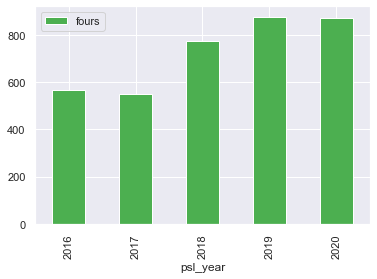

In [10]:
ax = boundries_df.plot('psl_year', 'fours', kind='bar',color = "#4CAF50",width = 0.5)

**Display total Sixe's in every year**

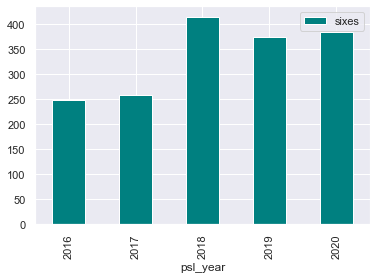

In [11]:
ax = boundries_df.plot('psl_year', 'sixes', kind='bar',color = "teal",width = 0.5)

In [12]:
boundries_df['fours_per_match'] = boundries_df['fours']/boundries_df['matches']
boundries_df['six_per_match'] = boundries_df['sixes']/boundries_df['matches']

<h2>Wickets</h2>

In [13]:
wickets = df['wicket_text'].value_counts()
wicket_dict = dict(wickets)
del_keys = []
others = 0
for key, value in wicket_dict.items():
    if value <100:
        others = others+value
        del_keys.append(key)
for del_key in del_keys:
    del(wicket_dict[del_key])
wicket_dict['others']= others
wicket_dict

{'caught': 1147, 'bowled': 328, 'run out': 165, 'lbw': 130, 'others': 46}

<BarContainer object of 5 artists>

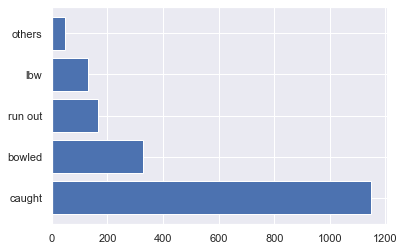

In [15]:
plt.barh(*zip(*wicket_dict.items()))


<h2>Defining Functions to bulit Prediction Model</h2>

In [16]:
# Method to calculate if the team batting second won or not
def is_winner(row):
    if type(row['result']) == str:
        if row['result'] in row['team_2']:
            return 1
        return 0
    else:
        return 0

In [17]:
# Method to calculate if a player was dismissed on this ball or not
def is_out(row):
    if type(row['player_dismissed']) == str:
        return 1
    else:
        return 0

<h2>Data Manipulation to Extract Important Features</h2>

In [18]:
# Splitting on Innings
first_inning = df[df['inning']==1]
second_inning = df[df['inning']==2]

In [19]:
# Calculating Target
total_sum = first_inning.groupby(["psl_year","match_number"]).agg(
   target= ("runs","sum")
)

In [20]:
total_sum = total_sum.reset_index()

In [21]:
# Merging the DF
new_df = pd.merge(total_sum, second_inning,  how='left', left_on=['psl_year','match_number'], right_on = ['psl_year','match_number'])

In [22]:
# Calculating if Second Inning team won or not 
new_df['won'] = new_df.apply(is_winner, axis=1)

In [23]:
# Calculating balls left
new_df['balls_left'] = 120-(((new_df['over']-1)*6)+new_df['ball'])

In [24]:
# Creating the Final Dataset
final_df = new_df[['over','ball','total_runs','wickets','target','balls_left','won']]

In [25]:
final_df.head()

,over,ball,total_runs,wickets,target,balls_left,won
0,1.0,1.0,0.0,0.0,128,119.0,1
1,1.0,2.0,0.0,0.0,128,118.0,1
2,1.0,3.0,0.0,0.0,128,117.0,1
3,1.0,4.0,2.0,0.0,128,116.0,1
4,1.0,5.0,2.0,0.0,128,115.0,1


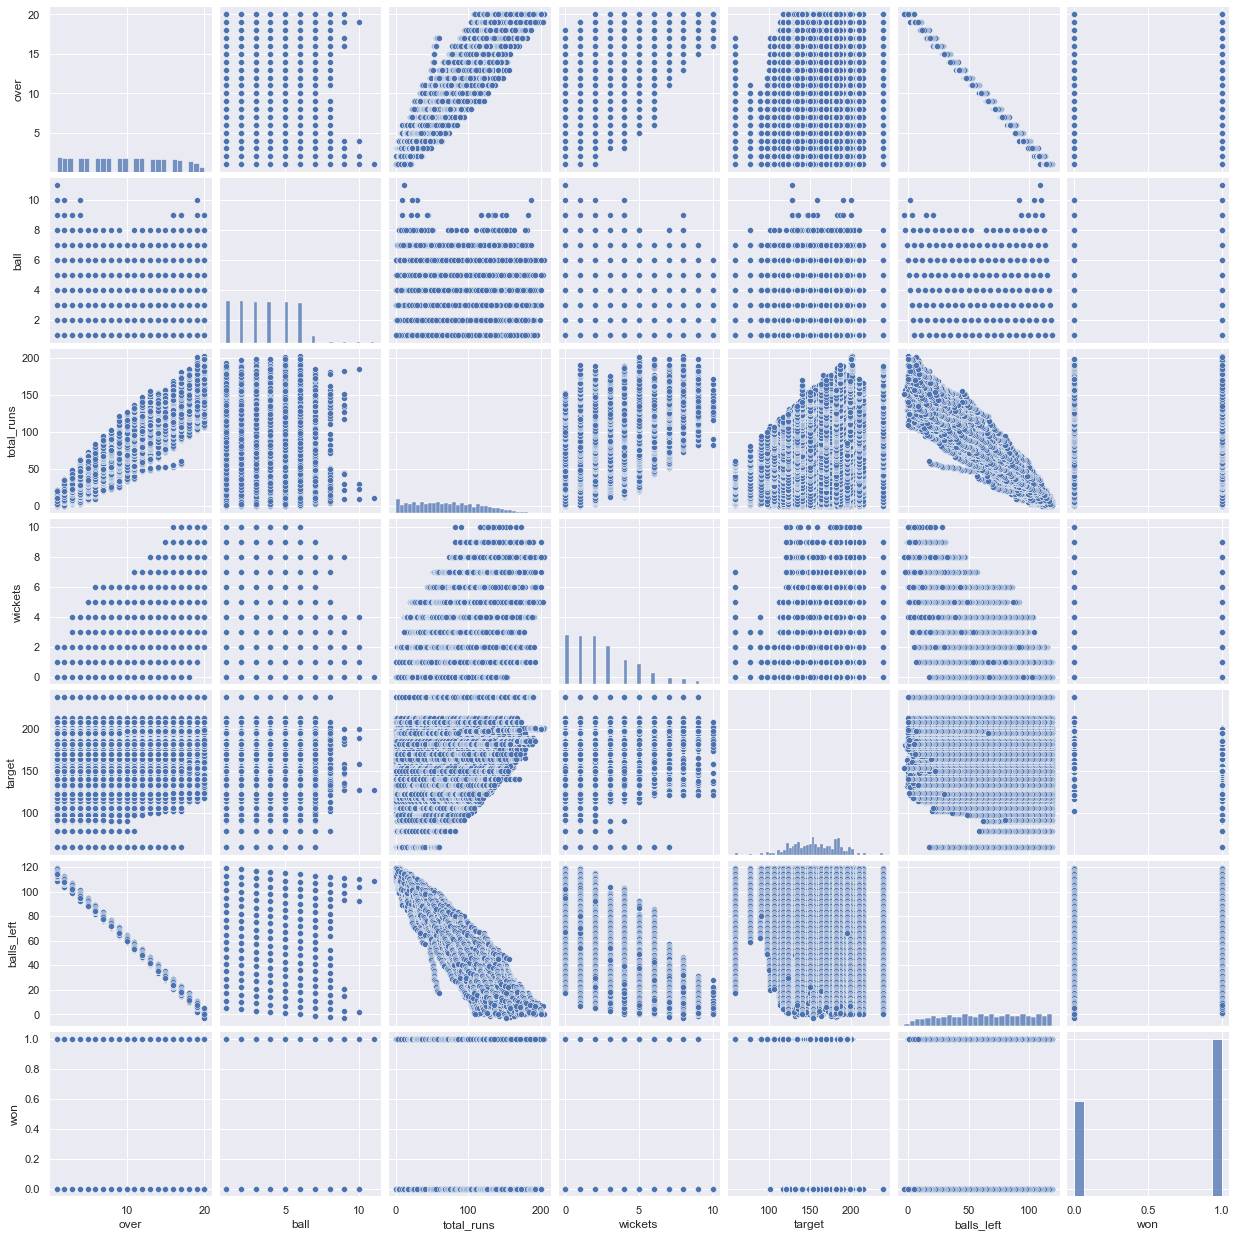

In [26]:
sns.pairplot(final_df)

In [27]:
final_df['runs_left'] = final_df['target']- final_df['total_runs']

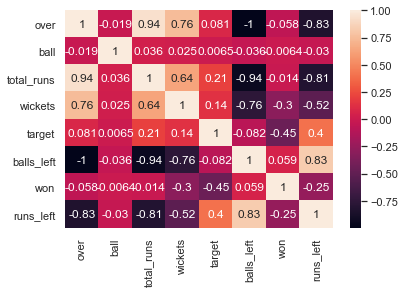

In [28]:
corrMatrix = final_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

<h2>Selecting particular columns for our model</h2>

In [29]:
new_cols =['wickets','balls_left','runs_left','won']

In [30]:
psl_df = final_df[new_cols]
psl_df.head()

,wickets,balls_left,runs_left,won
0,0.0,119.0,128.0,1
1,0.0,118.0,128.0,1
2,0.0,117.0,128.0,1
3,0.0,116.0,126.0,1
4,0.0,115.0,126.0,1


In [31]:
psl_df.isnull().sum()

wickets       2
balls_left    2
runs_left     2
won           0
dtype: int64

In [32]:
psl_df.shape

(16318, 4)

In [33]:
psl_df = psl_df.apply (pd.to_numeric, errors='coerce')
psl_df = psl_df.dropna()

In [34]:
psl_df.shape

(16316, 4)

In [35]:
# X and Y Split
y = psl_df.iloc[:,3]
X = psl_df.iloc[:,:3]

In [36]:
# Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

<h2>Predictions with Random Forest Classifier</h2>

In [37]:
# Training Model
start = time.time()
RF = RandomForestClassifier(n_estimators = 10000, max_depth=6, random_state=0)
RF.fit(X_train, y_train)
print(f"Time Taken to Train {time.time()-start} seconds")

Time Taken to Train 118.29480266571045 seconds


In [38]:
y_pred_test = RF.predict(X_test)

In [39]:
accuracy=accuracy_score(y_test, y_pred_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.37%


In [40]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.77      0.60      0.68      1229
           1       0.79      0.89      0.84      2035

    accuracy                           0.78      3264
   macro avg       0.78      0.75      0.76      3264
weighted avg       0.78      0.78      0.78      3264



In [41]:
current= {
    "wickets":1,
    "balls_left" :105,
    "runs_left":137
}
current_df = pd.DataFrame(current,index=[0])

RF.predict_proba(current_df)

array([[0.3422821, 0.6577179]])

<h2>Predictions with XGBoost Classifier</h2>

In [42]:
XGBC = xgboost.XGBClassifier()
XGBC.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [43]:
y_pred = XGBC.predict(X_test)
predictions = [round(value) for value in y_pred]

In [44]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.31%


In [45]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73      1229
           1       0.82      0.90      0.86      2035

    accuracy                           0.81      3264
   macro avg       0.81      0.78      0.79      3264
weighted avg       0.81      0.81      0.81      3264



In [46]:
current= {
    "wickets":1,
    "balls_left" :105,
    "runs_left":137
}
current_df = pd.DataFrame(current,index=[0])
XGBC.predict_proba(current_df)

array([[0.22686851, 0.7731315 ]], dtype=float32)

<h2>Predictions with SVM</h2>

In [48]:
# Define model
SVC_model = svm.SVC()

# Fit model
SVC_model.fit(X_train, y_train)

#Predict Output 
predicted = SVC_model.predict(X_test)
a = accuracy_score(y_test,predicted)
print('The accuracy using SVM Classifier is:',format(a*100))

The accuracy using SVM Classifier is: 78.09436274509804


In [49]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.77      0.60      0.67      1229
           1       0.79      0.89      0.84      2035

    accuracy                           0.78      3264
   macro avg       0.78      0.74      0.75      3264
weighted avg       0.78      0.78      0.77      3264



In [52]:
logr = linear_model.LogisticRegression()

logr.fit(X_train, y_train)

LogisticRegression()

In [53]:
y_pred_test = logr.predict(X_test)

In [54]:
accuracy=accuracy_score(y_test, y_pred_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.33%


<h2>Result</h2>

<p>We have performed classification using different Classifiers and here is their Accuracy:</p>
<ul>
    <li><b>Random Forest Classifier: </b> 78.37%</li>
    <li><b>XGBoost Classifier: </b> 81.31%</li>
    <li><b>SVM: </b> 78.09%</li>
    <li><b>Logistic Regression : </b>  77.33%</li>
</ul>